# Summary Statistic for Categorical Variable

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


df = pd.read_csv('nyc_tree_census.csv')
df  = df.dropna()
print(df.shape)
df.head(3)

(47695, 6)


,tree_id,trunk_diam,status,health,spc_common,neighborhood
0,199250,8,Alive,Good,crab apple,Lincoln Square
1,136891,17,Alive,Good,honeylocust,East Harlem North
2,200218,3,Alive,Good,ginkgo,Chinatown


## Nominal Category
Because these variables’ categories have no ordering or numeric equivalents, `it’s impossible to calculate a mean or median`. `It would also be impossible to describe spread with statistics like variance, standard deviation, a range, IQR, or percentiles`, because these statistics all rely on being able to order the data in some way. However, it is still `possible to calculate the mode`, the most common value in the dataset.

#### Number of unique species

In [8]:
df.spc_common.nunique()

131

#### Frequency of top 10 most common species

`Note`: By default, missing values are not counted by .value_counts() thats why we drop all the Nan values ealier.

In [50]:
df.spc_common.value_counts().head(10)

London planetree     6472
honeylocust          4798
Callery pear         4189
pin oak              3792
Norway maple         2477
Japanese zelkova     2195
littleleaf linden    2187
cherry               2186
ginkgo               1517
Sophora              1457
Name: spc_common, dtype: int64

#### Proportion of top 10 most common species

In [71]:
df.spc_common.value_counts(normalize=True).head(10)

London planetree     0.135696
honeylocust          0.100598
Callery pear         0.087829
pin oak              0.079505
Norway maple         0.051934
Japanese zelkova     0.046022
littleleaf linden    0.045854
cherry               0.045833
ginkgo               0.031806
Sophora              0.030548
Name: spc_common, dtype: float64

#### Top 10 species

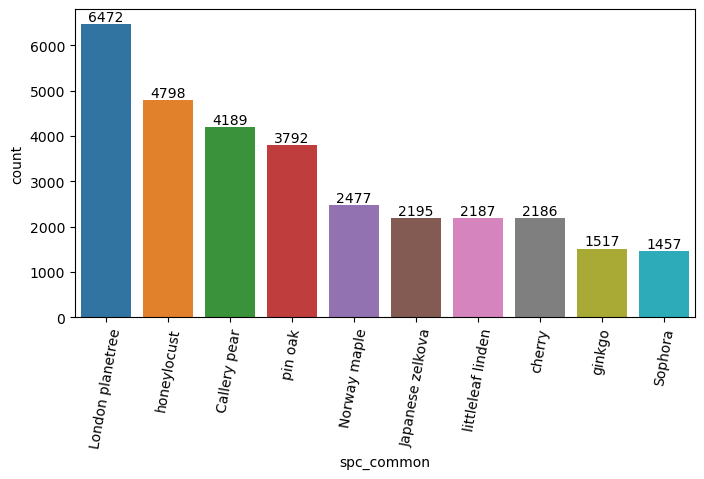

In [87]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'spc_common', 
                  data = df, 
                  order = df['spc_common'].value_counts().iloc[:10].index)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

## Ordinal Categorical Variables
Ordinal categorical variables have ordered categories. For ordinal categorical variables, we can find the `mode` and `median` `quantile` or `percentile`.

#### Unique values in health variable

In [73]:
df.health.unique()

['Good', 'Poor', 'Fair']
Categories (3, object): ['Poor' < 'Fair' < 'Good']

#### Frequency of each category in health variable

In [74]:
df.health.value_counts()

Good    38680
Fair     7005
Poor     2010
Name: health, dtype: int64

#### Proportion

In [75]:
import plotly.express as px
fig = px.pie(df, 'health')


fig.update_layout(title="Proportion of Health Category ")
fig.update_traces(textposition='inside',
                  textinfo='percent+label', showlegend=False)
fig.show()

### Mode

#### Summary stats

In [76]:
df[['spc_common', 'health' ]].describe()

,spc_common,health
count,47695,47695
unique,131,3
top,London planetree,Good
freq,6472,38680


Most frequent(mode) is category 'Good' with frequency of 38,680. 

#### Convert to categorical type

In [77]:
correct_order = ['Poor', 'Fair', 'Good']
df['health'] = pd.Categorical(df['health'], correct_order, ordered=True)
df['health'].info()

<class 'pandas.core.series.Series'>
Int64Index: 47695 entries, 0 to 49998
Series name: health
Non-Null Count  Dtype   
--------------  -----   
47695 non-null  category
dtypes: category(1)
memory usage: 419.3 KB


### Mean

In [78]:
mean_index = np.mean(df['health'].cat.codes)

print(mean_index)
health_mean = correct_order[int(mean_index)]
health_mean

1.7688436943075794


'Fair'

`Note`:  Mean value (1.76) is not interpretable. For ordinal categorical variables we should not use the mean because it's relies on the assumption of equal spacing between categories. Standard deviation and variance both depend on the mean, without a mean, `we can’t have a reliable standard deviation or variance either!`

Instead, we can rely on other summary statistics, like the `proportion of the data within a range, or percentiles/quantiles`.

### Percentile

In [79]:
# fucntion that take dataset percentage and plot in a stacked bar
def percentile_checker(percentage):
    percentile_ind = np.percentile(df['health'].cat.codes, percentage / .01)
    percentile_cat = correct_order[int(percentile_ind)]
    
    plt.figure(figsize = (6,4))
    plt.axhline(len(df.health) *percentage, color = 'red', linestyle='--', label = str(percentage))

    good = len(df[df['health'] == 'Good'])
    poor = len(df[df['health'] == 'Poor'])
    fair = len(df[df['health'] == 'Fair'])

    plt.bar(1, poor, label='Poor')
    plt.bar(1, fair, label='Fair', bottom=poor)
    plt.bar(1, good, label='Good', bottom=fair + poor)

    plt.legend()
    print(percentile_cat)

Poor


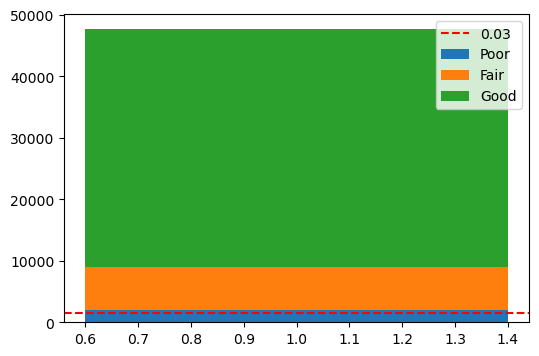

In [80]:
# input percetage here in decimal format
percentile_checker(.03)

### Median

In [81]:
df['health'].unique()

['Good', 'Poor', 'Fair']
Categories (3, object): ['Poor' < 'Fair' < 'Good']

In [82]:
median_index = np.median(df['health'].cat.codes)

print(median_index)
health_median = correct_order[int(median_index)]
health_median

2.0


'Good'

`Note:`

We only have three categories ordered by 'Poor', 'Fair',  and 'Good' looking at his order we can say that the median is `Fair`. We should'nt use this for statistic calculation because each categories are not equally space.

Good


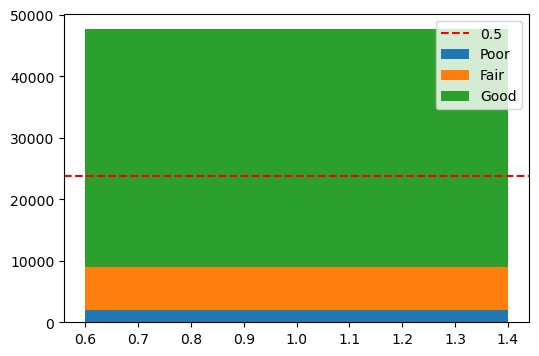

In [83]:
# median is also the 50% of the dataset (2nd quartile)
percentile_checker(.50)